In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
# from google.colab import files

import zipfile
import os

In [5]:
!unzip "image_pc.zip"

'unzip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [4]:
base_dir=r"/content/image_pc"

In [6]:
import zipfile, os

local ='image_pc.zip'
zip = zipfile.ZipFile(local, 'r')
# zip.extractall('/tmp')
zip.close()

base_dir = 'image_pc'

In [7]:
os.listdir('image_pc')

['Batterie', 'RAM', 'Ventilateur']

In [8]:
data_generator = ImageDataGenerator(rescale= 1./255,
                                    # horizontal_flip= True,
                                    # vertical_flip= True,
                                    # zoom_range= 0.3,
                                    # rotation_range= 90,
                                    # shear_range= 0.3,
                                    validation_split= 0.3)

train = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 32,
                                           target_size= (250, 250),
                                           subset='training')

validation = data_generator.flow_from_directory(base_dir,
                                           class_mode= 'categorical',
                                           batch_size= 32,
                                           target_size= (250, 250),
                                           subset='validation')

Found 126 images belonging to 3 classes.
Found 54 images belonging to 3 classes.


In [10]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nAkurasi telah mencapai lebih dari 95%, Training dihentikan!")
            self.model.stop_training = True
callback = Callbacks()

In [11]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(250, 250, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train,
                    epochs= 20,
                    verbose= 1,
                    callbacks=[callback],
                    validation_data=validation)

Epoch 1/20
4/4 [==============================] - 18s 4s/step - loss: 1.0989 - accuracy: 0.3095 - val_loss: 1.0759 - val_accuracy: 0.5926
Epoch 2/20
4/4 [==============================] - 15s 4s/step - loss: 1.0592 - accuracy: 0.5794 - val_loss: 1.0461 - val_accuracy: 0.3889
Epoch 3/20
4/4 [==============================] - 15s 4s/step - loss: 1.0216 - accuracy: 0.4444 - val_loss: 1.0047 - val_accuracy: 0.6111
Epoch 4/20
4/4 [==============================] - 16s 4s/step - loss: 0.9399 - accuracy: 0.7222 - val_loss: 0.9403 - val_accuracy: 0.6852
Epoch 5/20
4/4 [==============================] - 15s 4s/step - loss: 0.8784 - accuracy: 0.6905 - val_loss: 0.8744 - val_accuracy: 0.6667
Epoch 6/20
4/4 [==============================] - 16s 4s/step - loss: 0.7850 - accuracy: 0.7540 - val_loss: 0.8397 - val_accuracy: 0.6296
Epoch 7/20
4/4 [==============================] - 17s 4s/step - loss: 0.7173 - accuracy: 0.6746 - val_loss: 0.7827 - val_accuracy: 0.6481
Epoch 8/20
4/4 [==================

In [14]:
model.evaluate(validation, verbose=1)

2/2 [==============================] - 1s 458ms/step - loss: 0.7203 - accuracy: 0.6852


[0.7202666401863098, 0.6851851940155029]

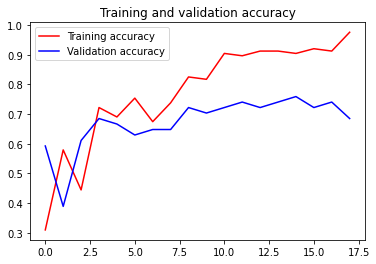

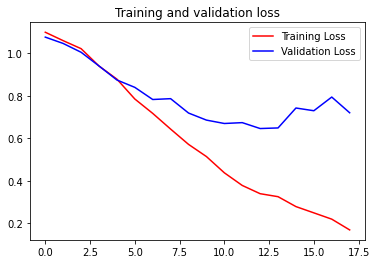

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# class_names = train.class_indices
class_names = {'RAM:': 1, 'Ventilateur': 2, 'Batterie': 0}
details = {'0':['Capacity: 3700mah', 'Install date: 12/12/2022', 'Efficiancy: 70%'], '1': ['Capacity 8GB', 'Install date: 12/12/2019', 'Efficiency: 60%'], '2': ['Voltage: 0.5V', 'Install date: 12/12/2022', 'Efficiancy: 80%']}
print(class_names)
print(details)

{'RAM:': 1, 'Ventilateur': 2, 'Batterie': 0}
{'0': ['Capacity: 3700mah', 'Install date: 12/12/2022', 'Efficiancy: 70%'], '1': ['Capacity 8GB', 'Install date: 12/12/2019', 'Efficiency: 60%'], '2': ['Voltage: 0.5V', 'Install date: 12/12/2022', 'Efficiancy: 80%']}


In [46]:
details.get('0')[0]

'Capacity: 3700mah'

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

1/1 [==============================] - 0s 48ms/step
Batterie


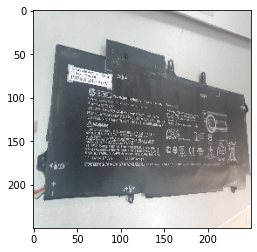

In [14]:
path = 'image_pc/Batterie/58.jpg'
img = tf.keras.utils.load_img(path, target_size=(250,250, 3))
imgplot = plt.imshow(img)
x = tf.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
predict = model.predict(images)
index = predict[0].argmax()

for key,value in class_names.items():
    if value == index:
        print(key)


In [22]:
pip install pyyaml h5py

Note: you may need to restart the kernel to use updated packages.


In [23]:
model.save('/tmp/model')
loaded_model = tf.keras.models.load_model('/tmp/model')

INFO:tensorflow:Assets written to: /tmp/model\assets


INFO:tensorflow:Assets written to: /tmp/model\assets


In [24]:
model.save("model_pc.h5")

In [12]:
from tensorflow.keras.models import load_model
model = load_model('model_pc.h5', compile=False)

In [28]:
import numpy as np
import cv2
import pickle
from time import sleep

width = 250
height = 250
threshold = 0.65  # MINIMUM PROBABILITY TO CLASSIFY
cameraNo = 0

# importing webcam footage
cap = cv2.VideoCapture(1)
cap.set(3, width)
cap.set(4, height)

# loading the training model
# pickle_in = open("C:/Users/Sakshee/model_trained.p", "rb")
# model = pickle.load(pickle_in)


def preProcessing(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.equalizeHist(img)
    img = img / 255
    return img


while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img, (250, 250))
    img = preProcessing(img)

#     cv2.imshow("Processsed Image", img)
#     img = img.reshape(1, 250, 250, 1)
    
#     img = tf.keras.utils.load_img(path, target_size=(250,250, 3))
    # imgplot = plt.imshow(img)
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    predict = model.predict(images)
    index = predict[0].argmax()

    for key,value in class_names.items():
        if value == index and max(predict[0])>0.75:
#             print(key)
#             cv2.putText(img,"Class:"+str(key),(0,0),0.75,(0,0,255),2,cv2.LINE_AA)
#             cv2.putText(
#                       img = img,
#                       text = "Class:"+str(key),
#                       org = (200, 200),
#                       fontFace = cv2.FONT_HERSHEY_DUPLEX,
#                       fontScale = 3.0,
#                       color = (125, 246, 55),
#                       thickness = 3
#                     )
    
    
#     # making predictions
#     classIndex = int(model.predict_classes(img))
#     print(classIndex)
#     predictions = model.predict(img)
#     print(predictions)
#     probVal = np.amax(predictions)
#     print(classIndex, probVal)

#     if probVal > threshold:
#         cv2.putText(imgOriginal, str(classIndex) + " " + str(probVal), (50, 50), cv2.FONT_HERSHEY_COMPLEX,
#                1, (0, 0, 255), 1)
#     cv2.putText(img,"Class:"+str(key),(50,50),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2,cv2.LINE_AA)
            font = cv2.FONT_HERSHEY_SIMPLEX

            # org
            org = (50, 50)
            org2 = (100, 100)
            # fontScale
            fontScale = 1

            # Blue color in BGR
            color = (0, 255, 255)

            # Line thickness of 2 px
            thickness = 2

            # Using cv2.putText() method
            image = cv2.putText(imgOriginal, "Class:"+ key , org, font, 
                                   fontScale, color, thickness, cv2.LINE_AA)
            for info in details.get(str(value)):
                image2 = cv2.putText(imgOriginal, info , org2, font, 
                               fontScale, color, thickness, cv2.LINE_AA)
                a, b = org2
                b += 50
                org2 = a, b
    
#    sleep(1)
    cv2.imshow("Original Image", imgOriginal)
    
    
    _, img_encoded = cv2.imencode('.jpg',imgOriginal)
    img_bytes = img_encoded.tobytes()
    img_b64 = base64.b64encode(img_bytes).decode('utf-8')
    html = '<img src"data:image/jpg;base64,{}">'.format(img_b64)
    urllib.request.urlopen('http://localhost:80/').write(html.encode())
    
    
    
    if cv2.waitKey(10) and 0xFF == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 31ms/step


URLError: <urlopen error [WinError 10061] Aucune connexion n’a pu être établie car l’ordinateur cible l’a expressément refusée>

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
max(predict[0])

In [18]:
import base64
import urllib